# IRAS 16562-3959 HDBSCAN

IRAS 16562-3959 is a young star-forming region containing more than 922 young stars. We are looking for clustering in this set of data by implementing HDBSCAN on the coordinates of the young stars.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
import matplotlib.patches as patches
import warnings

In [2]:
# Loading the data
X = np.loadtxt('All_protostars_with_unclass_Xray_physical_coordinates.txt')

# Printing the sets of physical coordinates for the first 5 sources
print(X[0:5])

[[ 4.79043211  5.07783651]
 [-1.00604     3.65495066]
 [ 3.7115212   3.21895132]
 [-0.9064359   3.02985845]
 [-1.31108312  3.01006622]]


In [3]:
# Implementing HDBSCAN with the below parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=1, alpha=1.3,
                            cluster_selection_method='leaf',
                            gen_min_span_tree=True)

# Fitting the data to the model
clusterer.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.3,
    approx_min_span_tree=True, cluster_selection_method='leaf',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=15, min_samples=1, p=None,
    prediction_data=False)

In [4]:
# Defining the color palette and applying to the clusters
color_pal = ['gold','royalblue', 'crimson','darkorchid','mediumseagreen','orange', 
             'mediumvioletred','aqua', 'salmon', 'lime','paleturquoise','plum',
             'rosybrown','darkcyan','olive','mediumblue']

pal = sns.color_palette(color_pal, 30)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]

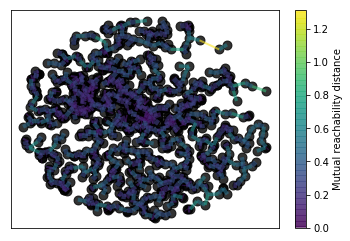

In [5]:
# Suppressing all warning messages
warnings.filterwarnings("ignore")

# Plotting the minimum spaning tree resulting from the HDBSCAN algorithm
plt.figure(1)
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)
plt.show()

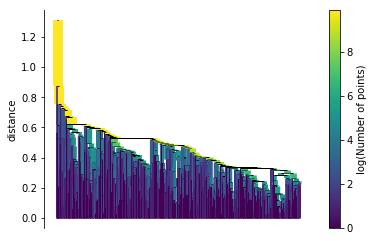

In [6]:
# Plotting the single linkage tree resulting from the HDBSCAN algorithm
plt.figure(2)
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

plt.show()

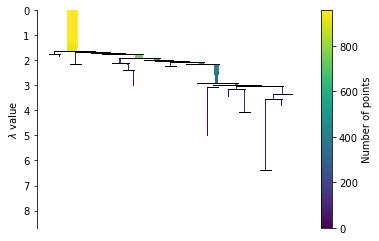

In [7]:
# Plotting the condensed tree resulting from the HDBSCAN algorithm
plt.figure(3)
clusterer.condensed_tree_.plot()

plt.show()

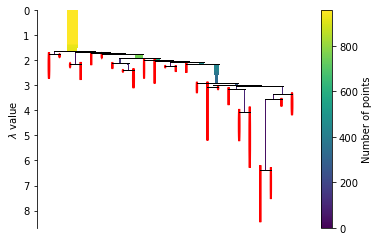

In [8]:
# Plotting the condensed tree with the selected clusters resulting from the HDBSCAN algorithm
plt.figure(4)
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

plt.show()

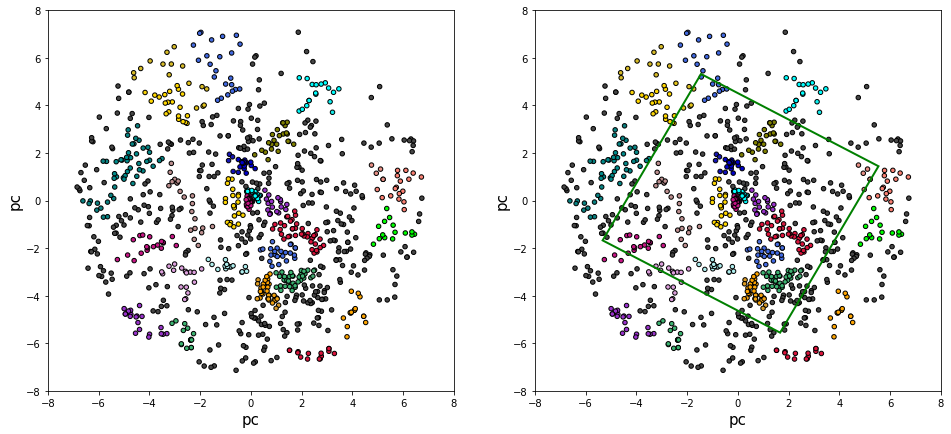

In [9]:
# Plotting the results of HDBSCAN clustering with color for each cluster
plt.figure(5, figsize=(16,7))
ax1 = plt.subplot(121)
ax1.scatter(X[:,1], X[:,0], c=colors, edgecolor='k', s=20)
plt.xlabel('pc', fontsize = 15)
plt.ylabel('pc', fontsize = 15)
plt.xlim(-8,8)
plt.ylim(-8,8)

# Relotting the results of HDBSCAN clustering with color for each cluster adding the field-of-view
# of the Chandra X-Ray Telescope (green square)
ax2 = plt.subplot(122)
ax2.scatter(X[:,1], X[:,0], c=colors, edgecolor='k', s=20)
rect = patches.Rectangle((-3.85,-4.05),8,8, fill=False, edgecolor='g', linewidth = 2)
t = mpl.transforms.Affine2D().rotate_deg(331) + ax2.transData
rect.set_transform(t)
plt.gca().add_patch(rect)
plt.xlabel('pc', fontsize = 15)
plt.ylabel('pc', fontsize = 15)
plt.xlim(-8,8)
plt.ylim(-8,8)


plt.show()